In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LogReg

### Classes

In [2]:
from final_project.scripts.PCA_class import PCA
from final_project.scripts.LinearRegression import LinearRegression
from final_project.scripts.ANN_class import ANN
from final_project.scripts.LogReg_class import LogisticRegression as LR

### Data Preprocessing

In [3]:
df = pd.read_csv("./data/sample_data_for_project_final.csv")
df2 = pd.read_csv("./data/sample_metadata_for_project_final.csv")
sample_data = df.copy()
meta_data = df2.copy()

#features as columns
sample_data = sample_data.T
#label features
sample_data.columns = sample_data.iloc[0,:]
#remove feature label row from data
sample_data = sample_data.iloc[1:,:]

#apply standardization 
sample_data = sample_data.apply(lambda x: (x-x.mean()) / x.std())

#add labels
meta_data.set_index("sample_name",inplace=True)
sample_data["label"] = meta_data["sample_label"]

sample_data.head()

Unnamed: 0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_15598,variable_15599,variable_15600,variable_15601,variable_15602,variable_15603,variable_15604,variable_15605,variable_15606,label
sample_1,-0.927535,3.371259,1.692038,-0.919555,-0.142398,0.713095,-0.671727,-1.154312,-0.750473,-0.393091,...,0.512582,-0.105584,-0.935505,-0.692686,-0.800395,2.965288,0.411993,-0.996253,-0.892706,0
sample_2,-0.121337,1.602545,0.408951,-0.013156,-0.14294,0.388468,-0.671727,-1.303229,-0.750473,-0.273319,...,-0.654291,-0.105584,-0.935505,-0.692686,-0.800395,-0.825397,1.318651,-0.286609,-0.892706,1
sample_3,0.051537,0.598268,0.254883,2.538848,-0.142655,-1.044927,-0.671727,-0.199079,-0.750473,0.294584,...,-0.654291,-0.105584,-0.935505,-0.692686,-0.800395,1.374655,2.355624,0.645572,-0.892706,0
sample_4,-0.634843,1.253738,0.75642,1.260138,-0.14294,-0.676461,-0.671727,-1.285239,-0.750473,-0.37706,...,2.402492,-0.105584,-0.935505,-0.692686,-0.800395,-0.825397,-0.158033,-0.996253,-0.892706,1
sample_5,-0.375922,1.795053,1.914371,0.557897,-0.14294,-0.267754,-0.671727,-0.60187,-0.750473,-0.094261,...,1.038176,-0.105584,-0.935505,-0.692686,-0.800395,1.640145,2.225708,0.269638,-0.892706,0


### PCA

Comments 
- Scree and Score plots from two methods have similar performance with the same variance explained by 
principal componenets

In [4]:
dR = PCA(data=sample_data,features_as_columns=True,class_label='label')
dR.do_PCA()

,0,1
sample_1,(-1.2992791458419757+0j),(-35.18059444631717+0j)
sample_2,(56.02472771168763+0j),(-13.618608170465302+0j)
sample_3,(-9.796292452098013+0j),(-28.542185517174055+0j)
sample_4,(63.323045810380876+0j),(-7.561501175465882+0j)
sample_5,(-9.949111583231852+0j),(-33.381285203595496+0j)
...,...,...
sample_860,(27.61758663328242+0j),(40.35389783901657+0j)
sample_861,(-49.74373876233704+0j),(31.813958089528438+0j)
sample_862,(11.87323018039293+0j),(29.977276302756927+0j)
sample_863,(-44.73278863944947+0j),(24.179858685891862+0j)


#### Scores Plot

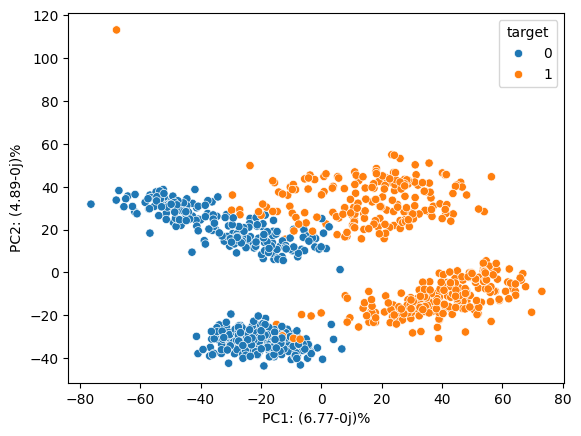

In [9]:
dR.PCplot()

In [ ]:
dR.scores()

#### sklearn implementation 

In [ ]:
from sklearn.decomposition import PCA as PrinicpalComponenentAnalysis

Unnamed: 0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_15598,variable_15599,variable_15600,variable_15601,variable_15602,variable_15603,variable_15604,variable_15605,variable_15606,label
sample_1,-0.927535,3.371259,1.692038,-0.919555,-0.142398,0.713095,-0.671727,-1.154312,-0.750473,-0.393091,...,0.512582,-0.105584,-0.935505,-0.692686,-0.800395,2.965288,0.411993,-0.996253,-0.892706,0
sample_2,-0.121337,1.602545,0.408951,-0.013156,-0.14294,0.388468,-0.671727,-1.303229,-0.750473,-0.273319,...,-0.654291,-0.105584,-0.935505,-0.692686,-0.800395,-0.825397,1.318651,-0.286609,-0.892706,1
sample_3,0.051537,0.598268,0.254883,2.538848,-0.142655,-1.044927,-0.671727,-0.199079,-0.750473,0.294584,...,-0.654291,-0.105584,-0.935505,-0.692686,-0.800395,1.374655,2.355624,0.645572,-0.892706,0
sample_4,-0.634843,1.253738,0.75642,1.260138,-0.14294,-0.676461,-0.671727,-1.285239,-0.750473,-0.37706,...,2.402492,-0.105584,-0.935505,-0.692686,-0.800395,-0.825397,-0.158033,-0.996253,-0.892706,1
sample_5,-0.375922,1.795053,1.914371,0.557897,-0.14294,-0.267754,-0.671727,-0.60187,-0.750473,-0.094261,...,1.038176,-0.105584,-0.935505,-0.692686,-0.800395,1.640145,2.225708,0.269638,-0.892706,0


In [ ]:
pca = PrinicpalComponenentAnalysis(n_components=25)
x = pca.fit_transform(sample_data.iloc[:,:-1])
x = pd.DataFrame(x)
x.columns = [f"PC{x+1}" for x in range(len(x.columns))]
x.index = [f"sample_{n+1}" for n in range(len(sample_data.index))]
x["sample_label"] = sample_data["label"]


In [24]:
PC1,PC2 = pca.explained_variance_ratio_[0:2]
PC1

0.06773103769435006

<Axes: title={'center': 'sklearn implementation'}, xlabel='PC1:6.77', ylabel='PC2:4.89'>

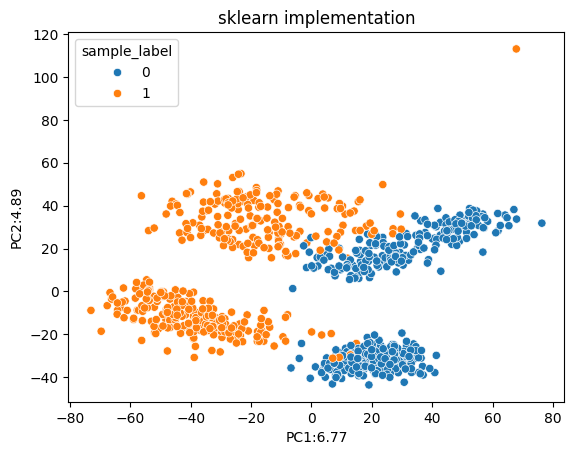

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel(f'PC1:{np.round(PC1*100,2)}')
ax.set_ylabel(f'PC2:{np.round(PC2*100,2)}')
ax.set_title("sklearn implementation")
sns.scatterplot(data=x,x="PC1",y="PC2",hue="sample_label")

##### sklearn scores plot

<Axes: xlabel='Principal Components', ylabel='% Variance Explained'>

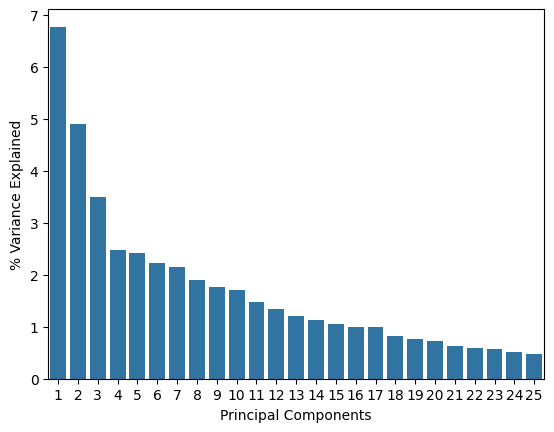

In [40]:
PCs = np.arange(pca.n_components_)+1
fig,ax = plt.subplots()
ax.set_xlabel("Principal Components")
ax.set_ylabel("% Variance Explained")
sns.barplot(x=PCs,y=pca.explained_variance_ratio_*100)

#### Scree Plot

[Text(0.5, 0, 'PC'),
 Text(0, 0.5, 'Variance Explained'),
 Text(0.5, 1.0, 'Scree Plot')]

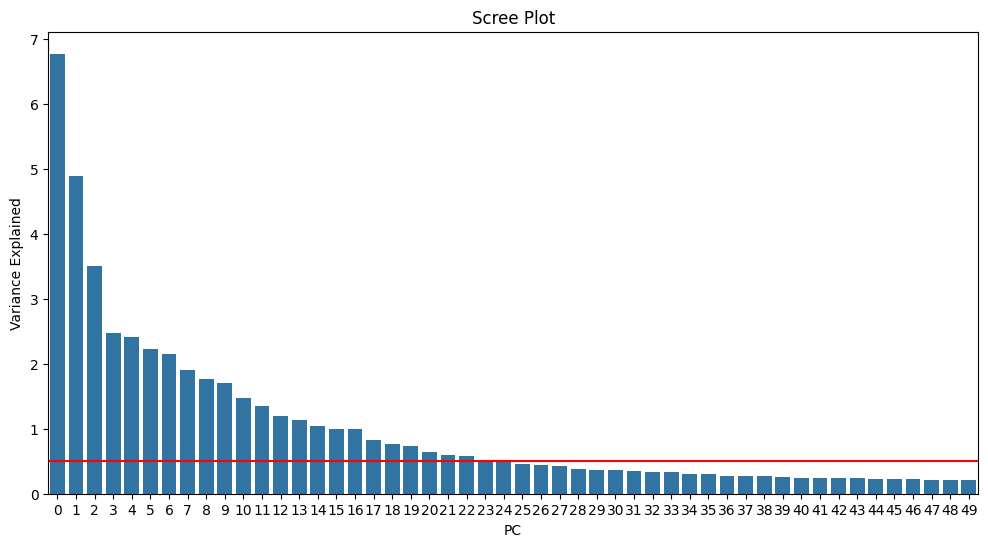

In [7]:
#Scree Plot
dR.eigenvalues = (dR.eigenvalues / np.sum(dR.eigenvalues))*100
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(dR.eigenvalues[:50,].real) #plotting first 50 
ax.axhline(y=0.5,color="red") #Moving forward, will just be using the first 24 PCs 
ax.set(xlabel="PC",ylabel="Variance Explained",title="Scree Plot")

#### Loadings Plots

##### Full Loadings

In [8]:
PC1 = dR.loadings[:,1]
PC2 = dR.loadings[:,2]
data_frame = pd.DataFrame([PC1,PC2])
Load = data_frame.T 
Features = [f'{x+1}' for x in range(len(Load))]
Load["Feature_N"] = Features
Load.set_index("Feature_N",inplace=True)
Load[0] = Load[0].apply(lambda x: x.real)
Load[1] = Load[1].apply(lambda x: x.real)

##### Segmented Loadings 

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2'), Text(0.5, 1.0, 'Loadings Plot')]

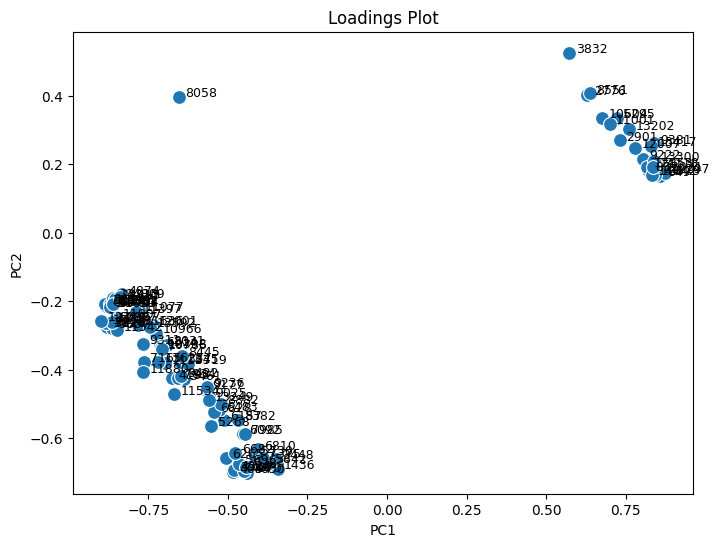

In [11]:
Load[2] = abs(Load[0]) + abs(Load[1])
Load = Load[Load[2] > 1]
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(data=Load,x=0,y=1,s=100)
for i, row in Load.iterrows():
    ax.text(row[0]+ 0.02, row[1] + 0.001, i, fontsize=9)
ax.set(xlabel="PC1",ylabel="PC2",title="Loadings Plot")

##### Top Contributors

In [ ]:
#Feature 4054 contributes the most to variance of PC1 and PC2 
print(Load[2].idxmax())
#Feature 14568 contributes to the most to variance in eigenspace. 
pd.DataFrame(dR.loadings.real).abs().sum(axis=1).idxmax()

4054


14568

### Linear Regression

#### Finding Linear Correlations

In [3]:
df = sample_data.copy()
df = df.iloc[:,:-1]
df.head()

Unnamed: 0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_15597,variable_15598,variable_15599,variable_15600,variable_15601,variable_15602,variable_15603,variable_15604,variable_15605,variable_15606
sample_1,-0.927535,3.371259,1.692038,-0.919555,-0.142398,0.713095,-0.671727,-1.154312,-0.750473,-0.393091,...,-0.67698,0.512582,-0.105584,-0.935505,-0.692686,-0.800395,2.965288,0.411993,-0.996253,-0.892706
sample_2,-0.121337,1.602545,0.408951,-0.013156,-0.14294,0.388468,-0.671727,-1.303229,-0.750473,-0.273319,...,-0.67698,-0.654291,-0.105584,-0.935505,-0.692686,-0.800395,-0.825397,1.318651,-0.286609,-0.892706
sample_3,0.051537,0.598268,0.254883,2.538848,-0.142655,-1.044927,-0.671727,-0.199079,-0.750473,0.294584,...,-0.67698,-0.654291,-0.105584,-0.935505,-0.692686,-0.800395,1.374655,2.355624,0.645572,-0.892706
sample_4,-0.634843,1.253738,0.75642,1.260138,-0.14294,-0.676461,-0.671727,-1.285239,-0.750473,-0.37706,...,-0.67698,2.402492,-0.105584,-0.935505,-0.692686,-0.800395,-0.825397,-0.158033,-0.996253,-0.892706
sample_5,-0.375922,1.795053,1.914371,0.557897,-0.14294,-0.267754,-0.671727,-0.60187,-0.750473,-0.094261,...,-0.67698,1.038176,-0.105584,-0.935505,-0.692686,-0.800395,1.640145,2.225708,0.269638,-0.892706


In [ ]:
correlation_matrix = df.corr()
mask = correlation_matrix.abs() >= 0.7
np.fill_diagonal(mask.values, False)
#saved to correlated_pairs.csv
correlated_pairs = correlation_matrix.where(mask).stack()

In [39]:
correlated_pairs_df = correlated_pairs.reset_index(allow_duplicates=True)
correlated_pairs_df.columns = ["x","y","r"]
correlated_pairs_df.head()

,x,y,r
0,variable_1,variable_24,0.754570
1,variable_2,variable_79,0.897521
2,variable_2,variable_616,0.802007
3,variable_2,variable_858,0.981480
4,variable_2,variable_1336,0.973943


#### Scatterplots

In [ ]:
#Python Script Submitted on HPC 

#data = pd.read_csv("../data/standardized_data.csv")
#data = data.iloc[:,:-1]
#correlated_pairs = pd.read_csv("../data/correlated_pairs.csv")
#pairs = [(j["x"],j["y"]) for i,j in correlated_pairs.iloc[:,:-1].iterrows()]

def plot_linear_correlated(dataset,pairs):
    for x,y in pairs:
        df = dataset[[x,y]]
        model = LinearRegression(dataset=df,alpha=0.01,theta0=1,theta1=1)
        J,theta0,theta1 = model.stopping_criteria()
        df["prediction"] = df[x].apply(lambda x: (x*theta1) + theta0)
        SSE = sum((df[y]-df["prediction"])**2)
        SST = sum((df[y]-df[y].mean())**2)
        R2 = 1 - (SSE/SST)
        with open("linreg_personal.txt","a") as f1:
            f1.write(f'{x},{y},{R2}\n')
        #ax = sns.scatterplot(data=df,x=x,y=y)
        #ax.set_title(f"{R2}")
        #ax.set_xlabel(f'{x}')
        #ax.set_ylabel(f'{y}')
        #plt.savefig(f'../q2/figures/{x}_{y}_scatterplot.png')
        #plt.clf()


#plot_linear_correlated(dataset=data,pairs=pairs)


<div style="text-align:center;">
  <img src="/Users/julianaileru/final_project/Q2/variable_44_variable_679_scatterplot.png" alt="Example">
</div>

In [ ]:
##Python Script submitted on HPC - written to sk_output.log 

# import pandas as pd 
# import numpy as np
# from LR import LinearRegression 
# from sklearn.linear_model import LinearRegression as LinReg

# df = pd.read_csv('./standardized_data.csv')
# df.drop(columns="Unnamed: 0",inplace=True)


def do_pairwise_lr(sample_data):
    from itertools import combinations
    corr_08_dict = {}
    combiner = combinations(sample_data.columns,2)
    lm = LinReg()
    for x,y in combiner:
        df = pd.DataFrame(sample_data[[x,y]])
        reg = lm.fit(df[x].values.reshape(-1,1),df[y])
        R2 = reg.score(df[x].values.reshape(-1,1),df[y])
        r = np.sqrt(R2) if lm.coef_[0] > 0 else -np.sqrt(R2)
        if abs(r) > 0.8:
            print(f'{r},{x},{y}')

#do_pairwise_lr(sample_data=df)

In [70]:
sklearn_output = pd.read_csv("data/sk_output.log",header=None)
sklearn_output.columns = ["R2","x","y"]
sklearn_output["R2"] = sklearn_output["R2"].apply(lambda x: x**2)
sklearn_output

my_output = pd.read_csv("./scripts/linreg_personal.txt",header=None)
my_output.columns = ["x","y","R2"]

In [72]:
sklearn_output = sklearn_output[["x","y","R2"]]
sklearn_output[sklearn_output["R2"] > 0.8]
my_output = my_output[["x","y","R2"]]
my_output[my_output["R2"] > 0.8]

,x,y,R2
1,variable_2,variable_79,0.804560
3,variable_2,variable_858,0.962328
4,variable_2,variable_1336,0.947589
6,variable_2,variable_2560,0.843086
24,variable_4,variable_559,0.929439
...,...,...,...
1367,variable_25,variable_9864,0.851326
1372,variable_26,variable_31,0.960488
1374,variable_26,variable_766,0.918014
1375,variable_26,variable_830,0.884615


In [81]:
my_output_copy = my_output.copy()
my_output_copy.set_index(["x","y"],inplace=True)
my_output_copy


sklearn_output_copy = sklearn_output.copy()
sklearn_output_copy.set_index(["x","y"],inplace=True)
sklearn_output_copy


my_output_copy["skR2"] = sklearn_output_copy["R2"]

#### sklearn output vs implementation

<Axes: xlabel='R2', ylabel='skR2'>

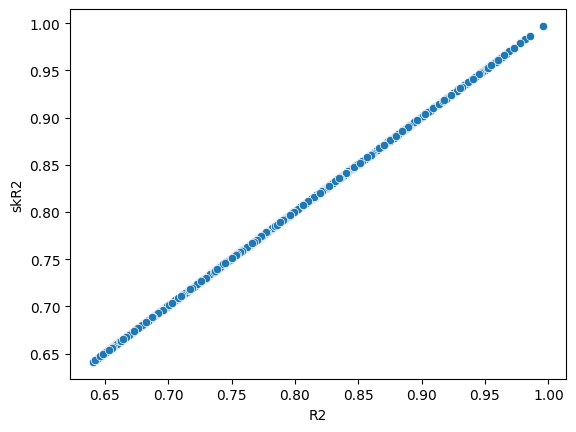

In [90]:
my_output_copy.dropna(inplace=True)
sns.scatterplot(data=my_output_copy,x="R2",y="skR2")

  ### Logistic Regression

#### Data Preprocessing

In [ ]:
retransform = sample_data.iloc[:,:-1].to_numpy()
retransform = retransform @ dR.eigenvectors[:,:25]
new_sample_data = pd.DataFrame(retransform)
new_sample_data.index = [f"sample_{i+1}" for i in range(len(new_sample_data.index))]
new_sample_data.columns = [f'PC{i+1}' for i in range(len(new_sample_data.columns))]
new_sample_data.head()

In [5]:
new_sample_data = pd.read_csv("./data/sample_data_DMR_25_features.csv")
new_sample_data.rename(columns={"Unnamed: 0":"index"},inplace=True)
new_sample_data.set_index("index",inplace=True)
new_sample_data["target"] = meta_data.sample_label

In [6]:
new_sample_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
index,,,,,,,,,,,,,,,,,,,,,
sample_1,(-1.2992791458420472+0j),(-35.18059444631706+0j),(21.737149201769675+0j),(-9.439285191695724+0j),(5.011353615102343+0j),(1.9639918472178004+0j),(-37.85193290546305+0j),(10.300881679357813+0j),(-12.758634532412337+0j),(-1.6740887622522878+0j),...,(-5.061557949600738+0j),(-13.816535499268715+0j),(-9.1690256354545+0j),(-14.728206463120777+0j),(-11.280433745485865+0j),(9.49252798049793+0j),(-6.406276960410602+0j),(-2.440489579503834+0j),(-10.183680674742353+0j),0
sample_2,(56.024727711687724+0j),(-13.618608170465242+0j),(5.113139449341061+0j),(-17.361513088306022+0j),(4.2377451575447465+0j),(9.877330810116451+0j),(-20.514424639387393+0j),(16.74799780938346+0j),(-9.054356828020744+0j),(5.289066542622497+0j),...,(-5.308413095142297+0j),(-11.55032212279642+0j),(-9.960042652480158+0j),(-12.511133020401306+0j),(-9.642225257396257+0j),(8.153539403831653+0j),(-1.7667524621862238+0j),(-12.184542312301058+0j),(-8.899642839742281+0j),1
sample_3,(-9.796292452098134+0j),(-28.54218551717394+0j),(8.149150237627596+0j),(-7.597924648509099+0j),(-10.311622637099383+0j),(22.703924254539945+0j),(-38.195702457027366+0j),(12.7102855834869+0j),(-13.437999552968094+0j),(-5.3588101842316895+0j),...,(14.258880692366677+0j),(-4.252368965465599+0j),(-11.176532701498239+0j),(-8.981795161087058+0j),(-15.674753353070866+0j),(18.46126575314045+0j),(13.38302278923056+0j),(2.1520418734530393+0j),(-14.283681997534295+0j),0
sample_4,(63.32304581038089+0j),(-7.56150117546585+0j),(6.554272068544437+0j),(-25.398038664639834+0j),(-15.56246575028725+0j),(22.730489112045035+0j),(-17.897908513286204+0j),(2.934246282263328+0j),(-4.716137734756265+0j),(1.519577334424355+0j),...,(2.0897110540967123+0j),(-8.715399892566328+0j),(5.374129402888686+0j),(-15.088365909573499+0j),(8.84683863371913+0j),(0.8751440710537186+0j),(9.087639157662656+0j),(-8.8331677205721+0j),(-8.881744410924519+0j),1
sample_5,(-9.949111583231966+0j),(-33.3812852035954+0j),(26.704238503939827+0j),(-16.86451140441459+0j),(-19.047700515204614+0j),(19.14994958435031+0j),(-40.74764497212868+0j),(-13.625101253393401+0j),(-11.60758990070965+0j),(-13.99284358070101+0j),...,(6.088542227108049+0j),(-1.1755019447412207+0j),(16.78855833554276+0j),(-10.644548789237339+0j),(22.66261046388021+0j),(-12.834943815636057+0j),(6.365431151721219+0j),(9.466210368684548+0j),(-20.54541732149327+0j),0


In [7]:
new_sample_data["target"] = sample_data["label"]
new_sample_data_real = new_sample_data.apply(lambda x:x.astype(str).str.split("+").str[0])
new_sample_data_real = new_sample_data_real.apply(lambda x: x.str.replace("(",""))
#convert dtypes to float 
for i in new_sample_data_real.columns[:-1]:
    new_sample_data_real[i] = new_sample_data_real[i].astype(float)
new_sample_data_real["target"] = new_sample_data_real["target"].astype(int)
#convert indexes to integers
new_sample_data_real.reset_index(inplace=True)
old_index = new_sample_data_real["index"]
new_sample_data_real = new_sample_data_real.iloc[:,1:]
new_sample_data_real.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
0,-1.299279,-35.180594,21.737149,-9.439285,5.011354,1.963992,-37.851933,10.300882,-12.758635,-1.674089,...,-5.061558,-13.816535,-9.169026,-14.728206,-11.280434,9.492528,-6.406277,-2.440490,-10.183681,0
1,56.024728,-13.618608,5.113139,-17.361513,4.237745,9.877331,-20.514425,16.747998,-9.054357,5.289067,...,-5.308413,-11.550322,-9.960043,-12.511133,-9.642225,8.153539,-1.766752,-12.184542,-8.899643,1
2,-9.796292,-28.542186,8.149150,-7.597925,-10.311623,22.703924,-38.195702,12.710286,-13.438000,-5.358810,...,14.258881,-4.252369,-11.176533,-8.981795,-15.674753,18.461266,13.383023,2.152042,-14.283682,0
3,63.323046,-7.561501,6.554272,-25.398039,-15.562466,22.730489,-17.897909,2.934246,-4.716138,1.519577,...,2.089711,-8.715400,5.374129,-15.088366,8.846839,0.875144,9.087639,-8.833168,-8.881744,1
4,-9.949112,-33.381285,26.704239,-16.864511,-19.047701,19.149950,-40.747645,-13.625101,-11.607590,-13.992844,...,6.088542,-1.175502,16.788558,-10.644549,22.662610,-12.834944,6.365431,9.466210,-20.545417,0


##### Split Dataset

In [82]:
from sklearn.model_selection import train_test_split
X = new_sample_data_real.iloc[:,:-1]
y = new_sample_data_real.iloc[:,-1]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,stratify=y,random_state=1)

sample_data_train = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
sample_data_test = pd.concat([X_test,pd.DataFrame(y_test)],axis=1)

#### Class Implementation

In [52]:
lr_model = LR(data=sample_data_train)
cost_dictionary = lr_model.stopping_criteria(n=100,max_iterations=100000)

Stopping criteria met at iteration 68
Total iterations completed: 68


In [54]:
cost,parameters = cost_dictionary.get(67)
bias = parameters[0]
parameters = parameters[1:]
print(cost)
print(parameters)
print(bias)

4.830888598332089e-06
[ 7.28923     4.2736224  -2.40315777 -2.92955955 -1.09420413  0.27774539
  3.39202334  0.4777262  -0.22298374  0.51898934 -1.17486599  1.89920748
 -0.74829169 -1.94728396  3.27759975  3.13147767 -4.5784473   2.15714085
  1.03355581  1.08581019 -2.68834775  0.50203661 -0.97006561  2.86430209
 -2.76586836]
1.0794442917415437


In [55]:
sample_data_test["linear_combination"] = sample_data_test.iloc[:,:-1].apply(lambda x: np.dot(x,parameters)+ bias,axis=1)
sample_data_test["predicted"] = sample_data_test["linear_combination"].apply(lambda x: np.round(1 / (1 + np.exp(-x))))
sample_data_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target,linear_combination,predicted
863,-16.068312,42.730897,-36.764321,-25.554646,13.423180,30.120418,11.012105,-17.543955,17.717419,-13.368885,...,7.483527,-6.595755,-1.282818,14.855071,-9.458530,13.587570,10.553270,1,392.915528,1.0
853,11.107997,40.995469,-30.000539,-22.055020,22.851870,26.982444,12.065541,-10.217465,11.096431,-3.809853,...,-6.780432,-15.166333,0.621587,-8.051468,-3.967282,0.667932,1.911745,1,434.561537,1.0
186,-12.371216,-35.662989,3.737563,19.375085,55.242465,-24.300205,16.833889,26.075823,-11.587642,15.509331,...,-7.587438,17.903674,-16.983536,-16.450840,-5.357088,-13.475114,-12.891930,0,-195.506081,0.0
592,-7.601546,8.935827,50.728856,22.767262,20.078965,-14.449958,15.560210,6.241877,16.092758,14.490408,...,1.287644,-0.280472,-6.192464,-1.869141,-0.847411,-15.165126,-5.780999,0,-188.441373,0.0
124,-14.915863,-33.833477,-4.470879,16.696207,8.935008,9.235357,-14.208483,17.010667,8.433250,27.238275,...,-1.141432,1.886027,2.229875,-8.390278,-2.929557,3.256355,-0.489577,0,-265.759875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,57.703563,-8.725100,-12.531960,-6.323517,4.373443,16.228390,2.204421,13.684456,3.315565,21.583863,...,19.930247,3.198823,11.758173,2.457075,-1.025432,-13.742378,1.695957,1,452.037567,1.0
90,-23.652909,-32.468519,-3.335669,9.408773,8.636193,13.499663,-15.233202,16.184231,1.773061,22.263410,...,14.403528,11.109639,-6.790896,-3.125446,-12.084371,-1.489694,-7.313954,0,-236.736230,0.0
283,-14.836837,-24.255517,-14.988311,-4.142743,-21.434841,1.969456,9.924080,-6.940243,1.528525,-2.610541,...,-13.724302,7.421824,-11.395868,9.257883,9.752444,-5.068614,0.113177,1,81.231298,1.0
53,47.021134,-14.029348,11.019349,-33.098940,-9.496325,19.018675,-32.095664,13.734192,-13.097065,-9.377173,...,-3.175125,-5.671572,-4.834647,1.691052,-2.915683,4.004001,7.767905,1,230.916431,1.0


#### Evaluation

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(sample_data_test.target,sample_data_test.predicted)*100
print(f"Accuracy:\t{accuracy}")

Accuracy:	98.26589595375722


#### sklearn implementation

In [57]:
model = LogReg(max_iter=10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'sklearn accuracy: {accuracy*100}')
print(model.n_iter_)
print(model.n_features_in_)

sklearn accuracy: 99.42196531791907
[201]
25


### ANN

In [ ]:
from sklearn.model_selection import train_test_split
X = new_sample_data_real.iloc[:,:-1]
y = new_sample_data_real.iloc[:,-1]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,stratify=y,random_state=1)

sample_data_train = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
sample_data_test = pd.concat([X_test,pd.DataFrame(y_test)],axis=1)

#### Class implementation

In [84]:
ANN_sample_data = sample_data_train.copy()
ANN_testing_data = sample_data_test.copy()
ANN_sample_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
577,22.618955,21.019338,40.893780,24.286604,0.839053,3.231461,14.146587,-5.496574,25.826627,14.419351,...,0.420814,-3.381071,-0.897794,0.627076,-6.011066,-2.626461,-1.311154,1.454125,0.314289,1
782,-29.769045,14.124810,-6.492615,-0.556269,56.426610,-1.307541,3.372914,-0.120773,2.102224,3.409150,...,-10.102925,3.220641,13.225426,-1.383405,-7.676313,7.882256,11.407045,-12.606069,-28.374083,0
33,66.746609,-0.548984,-0.073286,-36.306322,-26.599377,29.249873,-17.487411,7.125213,-1.615596,-3.172365,...,6.163062,-6.754683,-2.374736,-10.643980,1.776324,-2.463746,-4.785550,-7.941461,6.466172,1
494,42.894232,23.911005,28.891861,-3.744797,23.151305,5.790417,15.531318,36.174783,-11.418457,-21.292293,...,-10.345100,2.426293,-1.993594,1.410954,2.061727,-1.923585,14.809074,11.163040,8.200382,1
832,-45.492247,28.509962,-23.052862,-1.258526,47.209358,9.526287,8.633005,-6.315452,11.678638,-1.791957,...,-14.609683,-7.264636,-16.302344,-15.636505,-8.891316,-1.014138,-17.643911,-2.401400,8.598457,0


In [85]:
ANN_testing_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
306,-22.905813,-25.111141,-8.435595,7.595300,-13.545077,-3.706781,10.005320,-14.626036,3.859306,2.352860,...,-18.644476,2.089608,-8.530835,-26.960036,-6.050650,-1.552020,8.109826,-6.499994,-0.644067,0
50,-10.359270,-34.164105,25.115567,-21.341740,-4.213043,15.392755,-46.783680,8.381633,-15.837503,-13.510159,...,9.455656,6.693204,-6.448288,-0.462677,-3.268752,-11.042563,2.017866,-7.232775,2.116547,0
230,-29.287152,-32.687747,-15.750559,10.058508,11.160477,-7.336212,12.574921,6.146008,-1.487955,11.151258,...,25.665553,-11.758739,4.825771,-20.246105,-1.296422,2.983845,-11.553740,2.612506,-8.319343,0
105,51.103151,-4.645650,-10.291256,40.020309,4.850866,0.988241,-33.628887,-8.644426,-2.137213,6.974086,...,-12.655805,-7.531553,4.485552,8.421943,7.258637,7.827822,2.067138,-2.937485,6.942634,1
103,56.527598,2.184154,-10.990437,42.955931,-3.697877,4.004003,-39.243176,-19.937568,-5.238906,-1.534654,...,-8.206039,-1.336414,5.389358,9.424419,6.767993,-2.780847,0.538996,-9.657490,3.783489,1


In [94]:
model = ANN(data=ANN_sample_data)
model.stopping_criteria(n=1000,threshold=0.00001)
print("Trained Parameters")
print(40*"-")
print(f'Input_W:{model.Input_W}')
print(f'Input_B:{model.Input_B}')
print(f'Hidden_W:{model.Hidden_W}')
print(f'Hidden_B:{model.Hidden_B}')

Stopping criteria met at iteration 1190
Trained Parameters
----------------------------------------
Input_W:[[-0.11631341  0.49259447]
 [ 0.97592642 -1.20325445]
 [ 0.40138829 -0.55034028]
 [-0.12173788  0.13985051]
 [-0.1911455   0.26240533]
 [-0.03888559  0.13679458]
 [ 0.09109336 -0.11335778]
 [ 0.2824846  -0.38734025]
 [-0.0859178   0.23735776]
 [-0.06798411  0.16220782]
 [ 0.02431017  0.05847516]
 [-0.09475967  0.02903892]
 [-0.13430375 -0.12415825]
 [-0.06264421 -0.0714811 ]
 [ 0.0220183   0.28656239]
 [ 0.13303953 -0.30797107]
 [ 0.24773265 -0.0928133 ]
 [-0.56051291  0.40441594]
 [ 0.36198815 -0.38655155]
 [-0.35355813 -0.0308135 ]
 [ 0.01563773 -0.07624795]
 [-0.33226566  0.40531376]
 [-0.05976886 -0.29931334]
 [ 0.13150816 -0.05290379]
 [ 0.45017408 -0.22152485]
 [-0.32426047 -0.0467714 ]]
Input_B:[-0.11631341  0.49259447]
Hidden_W:[[ 0.32534888  0.18347711]
 [ 4.81216621  4.95851847]
 [-7.22082336 -7.22519038]]
Hidden_B:[0.32534888 0.18347711]


#### Evaluation

In [ ]:

def sigmoid_activation(z):
    activity = 1 / (1 + np.exp(-z))
    return activity
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

def apply_params(row, Input_W, Hidden_W):
    sample_data = row.to_numpy()
    sample_data = np.insert(sample_data, 0, 1) 
    
    hidden_input = sample_data.dot(Input_W)  # Shape (2,)
    hidden_activation = sigmoid_activation(hidden_input)
    
    # Add bias term to hidden layer
    hidden_activation = np.insert(hidden_activation, 0, 1)  # Shape becomes (3,)
    
    # Forward pass through hidden layer to output layer
    output_input = hidden_activation.dot(Hidden_W)  # Shape (2,)
    predicted = sigmoid_activation(output_input)  # Apply sigmoid for final output
    
    return predicted

In [95]:
predictions = []

for index,row in ANN_testing_data.iloc[:,:-1].iterrows():
    predictions.append(np.argmax(apply_params(row=row,Input_W=model.Input_W,Hidden_W=model.Hidden_W)))
sample_data_test["predictions"] = predictions

#### Accuracy

In [97]:
print(f'Accuracy:{100*accuracy_score(sample_data_test["target"],sample_data_test["predictions"])}')

Accuracy:94.79768786127167


#### sklearn Implementation

In [98]:
from sklearn.neural_network import MLPClassifier as NN

In [99]:
N_network = NN(hidden_layer_sizes=(2,),activation='logistic',solver='sgd',max_iter=10000)
N_network.fit(X_train,y_train)
NNpredictions = N_network.predict(X_test)

#### sklearn accuracy

In [100]:
print(100*accuracy_score(y_test,NNpredictions))

96.53179190751445


#### sklearn accuracy on real data

In [105]:
X_real = sample_data.iloc[:,:-1]
y_real = sample_data.iloc[:,-1]
X_train_real, X_test_real, y_train_real,y_test_real = train_test_split(X_real,y_real,test_size=0.2,train_size=0.8,stratify=y,random_state=42)

In [106]:
print(100*accuracy_score(y_test_real,NNpredictions))

49.13294797687861
